# Notebook 1: Week 7 Assignment by Maya Coronado (AMKSX/NutriNet)
### Description: To run data looking at the income and race breakdown for SPA 4 (Metro) and SPA 5 (West) in LA County and draw interpretations to assist with the final project. 
### Research Question: What contributes to food security and associated health outcomes at the community level in Los Angeles (LA) County?
### Addn. Questions: Which communities are particularly vulnerable to food insecurity? What are the demographics of the most vulnerable communities?
### What are the impacts of food insecurity on birth outcomes, specifically low birth weight?

### Data sources used in this notebook inlcude: Census Tracts Data for LA County in 2020, Median Household Income in LA County in 2022, Race Data (Soruced from LA Times Article, Week 3 Lab)

In [2]:
# I will start the notebook by importing all the libraries I will need to use for various tasks. 
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import contextily as ctx 

In [3]:
### The primary datafile that will be used for this portion of the analysis is the SPAs CSV file. It contains the median household income within SPA 4 and 5 (I already 
### filtered out the other planning areas) broken up by census tract. Bringing in the datafile that I need. This will be titled as df. 
df = pd.read_csv('spas.csv')

In [4]:
### I need to understand the makeup of this file, so I will run the data size first.
df.shape

(537, 13)

In [5]:
### I will also include the head commnd to see the variable names. 
df.head()

,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length
0,6037199700,38892.0,1204,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463240
1,6037199801,41027.0,903,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827
2,6037199802,42500.0,612,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225
3,6037199900,37232.0,845,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728020
4,6037201110,65000.0,782,Low Income,Yes,No,Yes,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383640


In [6]:
### The file contains median household income, which is my primary indicator of interest for this portion of the project. It is important to use this as it is as 
### well-recognized indicator of poverty. A lower income can highlight additional barriers for households to purchase food. I can see that the census tract does not currently have 
### a leading zero. I will need to add the string variable in using the following piecec of code.
df = pd.read_csv(
    'spas.csv',
    dtype=
    {
        'tract':str
    
    }
)

In [7]:
### Running the head function again to ensure that my previous code cell worked. 
df.head()

,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length
0,06037199700,38892.0,1204,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463240
1,06037199801,41027.0,903,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827
2,06037199802,42500.0,612,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225
3,06037199900,37232.0,845,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728020
4,06037201110,65000.0,782,Low Income,Yes,No,Yes,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383640


In [8]:
### Great. For this portion, I am leaving the column names as is. I want to pull some desriptive statistics for reference. The variable 'med_hh_income' will be 
### what I am looking at. 
df['med_hh_income'].head()

0    38892.0
1    41027.0
2    42500.0
3    37232.0
4    65000.0
Name: med_hh_income, dtype: float64

In [9]:
### I will first pull the mean. I expect this to be higher than the median as it also incorporates extreme outliers. 
df['med_hh_income'].mean()

78930.95856873824

### The mean household income of SPA 4 and 5 is $78k. This is higher than what I'd expect so I wonder if SPA 5's values are inflating values. Let's run median as it should be a bit lower. 

In [10]:
df['med_hh_income'].median()

70504.0

### The median household income of the two SPAs is $70k. Again, it's still somewhat higher than I initially anticipated, but I do believe that SPA 5 is causing this.

In [11]:
### Regardless, it's good to know that half the population falls below $70k and half makes more than that. I'd also like to see income broken up by quantiles 
### to understand how much that 25% of the population makes.
df['med_hh_income'].describe()

count       531.000000
mean      78930.958569
std       42882.946877
min        4918.000000
25%       48458.500000
50%       70504.000000
75%       98358.500000
max      250001.000000
Name: med_hh_income, dtype: float64

### There's a census tract that has households making less than five thousand a year. That is fourteen (!) times less than the median household income. The lowest 25% of the population makes $48k a year. Unfortunately, this dataset doesn't include how many individuals are in that household. This could help us understand if there are certain census tracts living below the federal poverty line.

<Axes: ylabel='Frequency'>

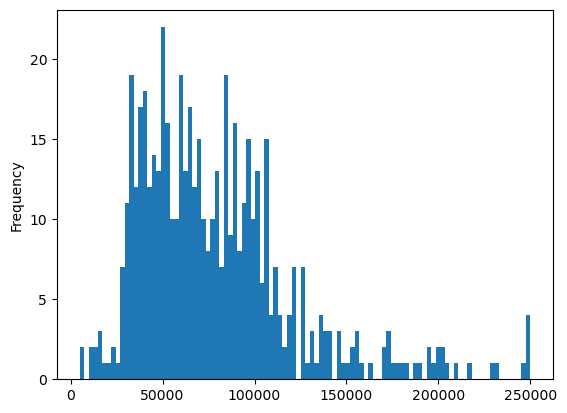

In [13]:
### I will pull togethr some charts and graps that help illustrate the income breakdowns. A histogram can show the visual distribution of LA County in a quick snapshot. 
### I will look at 100 different census tracts to get a good representation of the data. 
df['med_hh_income'].plot.hist(bins=100)

### We can see that much of the data falls below $100k, matching our descriptive stats that I ran earlier. I want to further investigate which SPAs have the highest paid census tracts. I do believe that SPA 5 is what is driving the median income so high, so this can help confirm my suspiscion. 

In [14]:
### Sorting the data to understand which SPAs contain the 20 highest census tracts. 
df_sorted = df.sort_values(by='med_hh_income', ascending=False)

In [15]:
### Now, I'll rum the data to ensure it's been sorted. Again, my guess is that SPA 5 will dominate this chart's listing.
df_sorted [['med_hh_income', 'spa']].head(20)

,med_hh_income,spa
534,250001.0,SPA 5 - West
382,250001.0,SPA 5 - West
386,250001.0,SPA 5 - West
387,250001.0,SPA 5 - West
388,246750.0,SPA 5 - West
384,231188.0,SPA 5 - West
318,228836.0,SPA 4 - Metro
380,217396.0,SPA 5 - West
363,209083.0,SPA 5 - West
460,204583.0,SPA 5 - West


### SPA 5 represents 90% of this chart's listing. I will also run a bar chart to show this finding. 

<Axes: title={'center': 'Highest Median Household Incomes by SPA in LA County in 2022'}, xlabel='Source: LA Geo Hub (2022)'>

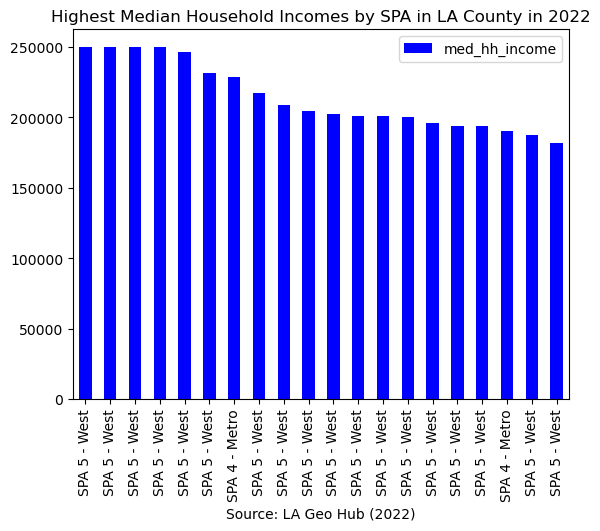

In [16]:
df_sorted.head(20).plot.bar(x='spa',
                             y='med_hh_income',
                             title='Highest Median Household Incomes by SPA in LA County in 2022',
                             color='blue',
                            xlabel='Source: LA Geo Hub (2022)')

### The highest paid SPA 5 census tract looks to make around $250k. 

In [17]:
### To be consistent, I will also look at the twenty census tracts with the lowest median household incomes. Based off of the charts that I've run so far, 
### it'll be predominantly SPA 4 on this list. 
### Adding in the function to sort this accordingly.
df_sorted = df.sort_values(by='med_hh_income', ascending = True)

In [18]:
### Running it now that I've sorted. 
df_sorted [['med_hh_income', 'spa']].head(20)

,med_hh_income,spa
52,4918.0,SPA 4 - Metro
51,7193.0,SPA 4 - Metro
50,11153.0,SPA 4 - Metro
57,11430.0,SPA 4 - Metro
60,12283.0,SPA 4 - Metro
49,12344.0,SPA 4 - Metro
429,15417.0,SPA 5 - West
191,16471.0,SPA 4 - Metro
430,16772.0,SPA 5 - West
64,17989.0,SPA 4 - Metro


### 85% of this chart contains SPA 4 census tracts. The highest earning census tract for this list makes below thirty thousand a year. Again, it would be useful to understand the household makeup when looking at these values. However, the federal poverty line for one person is $20k. Fifty-five percent of these census tracts make below that. 

<Axes: title={'center': 'Lowest Median Household Incomes by SPA in LA County in 2022'}, xlabel='Source: LA Geo Hub (2022)'>

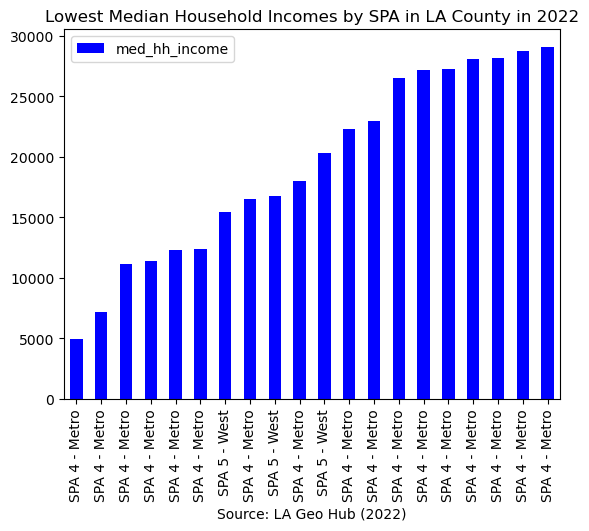

In [19]:
### Here is a chart to help visual the financial makeup of the lowest median household incomes by SPA. 
df_sorted.head(20).plot.bar(x='spa',
                             y='med_hh_income',
                             title='Lowest Median Household Incomes by SPA in LA County in 2022',
                             color='blue',
                            xlabel='Source: LA Geo Hub (2022)')

### I want to show a scatterplot of these two SPAs against eachother. I will make sure to sort them numerically to make things neat. 

In [21]:
df = df.sort_values (by='spa', ascending = False)

In [22]:
### Double checking it was sorted by running the head function. 
df.head()

,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length
536,06037980038,NaN,0,NaN,NaN,NaN,NaN,District 2,Unincorporated - Ladera Heights,SPA 5 - West,4581,4.852656e+07,42566.840170
410,06037703003,95613.0,3097,Moderate Income,No,No,Yes,District 2,City of Culver City,SPA 5 - West,3722,2.176849e+07,25008.239210
419,06037264304,97078.0,1446,Above Moderate Income,No,No,No,District 3,Los Angeles - Brentwood,SPA 5 - West,3798,2.225741e+06,7198.827025
418,06037264303,116414.0,1543,Above Moderate Income,No,No,No,District 3,Los Angeles - Brentwood,SPA 5 - West,3797,2.261082e+06,6586.023665
417,06037264103,126538.0,1562,Above Moderate Income,No,No,No,District 3,Los Angeles - Brentwood,SPA 5 - West,3796,2.490261e+06,7354.991688


<Axes: title={'center': 'SPAs Displayed by Median Household Income in LA County in 2022'}, xlabel='med_hh_income', ylabel='spa'>

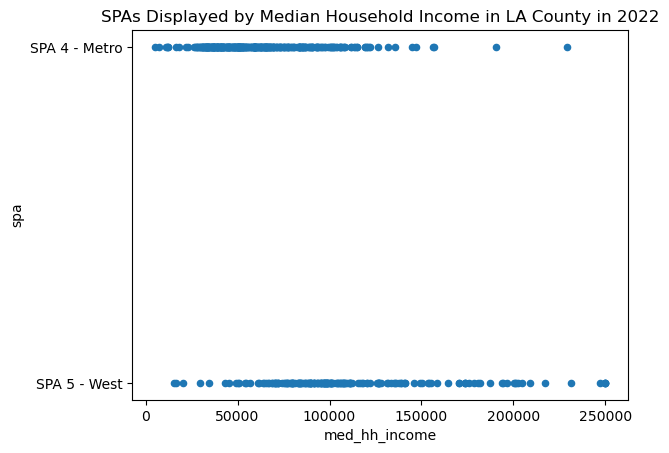

In [23]:
### It looks to have worked as SPA 5 is the service planning area with the highest median househodl incomes. I will now make it into a scatterplot. 
df.plot.scatter(x='med_hh_income', y='spa', title='SPAs Displayed by Median Household Income in LA County in 2022')

### Most of SPA 4 is concentrated in the left-most portion of the chart, with a few outliers (which we saw when running the top 20 highest earning census tracts). SPA 5 does have more range, but we can see a greater distribution of values running along $100k and higher. A major takeawawy from this chart is that a lower financial position can introduce additional barriers such as access to adequate healthcare, affordable and nutritious food, and parental stress (from financial standing). These factors can influence the birthweight of one's child.

In [24]:
### Mapping this data can help show the distribution of wealth and identify which regions of the SPAs may have greater financial disparities. 
import folium

In [25]:
### I need two different data files to map LA County. I will have to merge my SPAs file with my the Census Tracts geojson file (named df2).
df2=gpd.read_file('Census_Tracts_2020.geojson')
df2.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [26]:
### Including the tract column. For referenec, CA = 06 and LA County = 037.
df2['tract']='06' + '037' + df2 ['CT20']

In [27]:
### Since I've added in the tract column, I want to ensure it works before going any farther. I will run the head funtion to check. 
df2.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,tract
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [28]:
### Time to combine my two datafiles. The SPA csv (df) and my geojson file (df2), will be combined into df3.
df3=df2.merge(df,on='tract')

In [29]:
### I need to run the head function to check whether that was successful.
df3.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length
0,392,181000,1810.00,4.454338e+07,37799.839553,"POLYGON ((-118.19820 34.15163, -118.19893 34.1...",06037181000,107708.0,2315,Above Moderate Income,No,No,No,District 1,Los Angeles - Eagle Rock,SPA 4 - Metro,4295,4.444900e+07,37014.56487
1,393,181300,1813.00,1.551066e+07,21437.949799,"POLYGON ((-118.21866 34.13912, -118.21873 34.1...",06037181300,115174.0,1296,Above Moderate Income,No,No,No,District 1,Los Angeles - Eagle Rock,SPA 4 - Metro,4296,1.560564e+07,19883.49368
2,394,181400,1814.00,9.463031e+06,14429.046463,"POLYGON ((-118.21519 34.13931, -118.21631 34.1...",06037181400,85409.0,1674,Low Income,No,No,Yes,District 1,Los Angeles - Eagle Rock,SPA 4 - Metro,4297,9.425720e+06,14270.34000
3,395,181500,1815.00,1.177897e+07,17895.198610,"POLYGON ((-118.19982 34.13961, -118.20098 34.1...",06037181500,114034.0,1405,Above Moderate Income,No,No,No,District 1,Los Angeles - Eagle Rock,SPA 4 - Metro,4298,1.176077e+07,17618.24516
4,396,181600,1816.00,1.345468e+07,17952.905094,"POLYGON ((-118.20208 34.13103, -118.20205 34.1...",06037181600,90571.0,1079,Low Income,No,No,Yes,District 1,Los Angeles - Eagle Rock,SPA 4 - Metro,4299,1.336064e+07,17197.12390


### That worked! Re-introducing some libraries before running my maps. 

In [30]:
pip install geopandas matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt

### I will run a map using natural breaks. This means that the output will be classified based on clustered values in the same class. 

<Axes: >

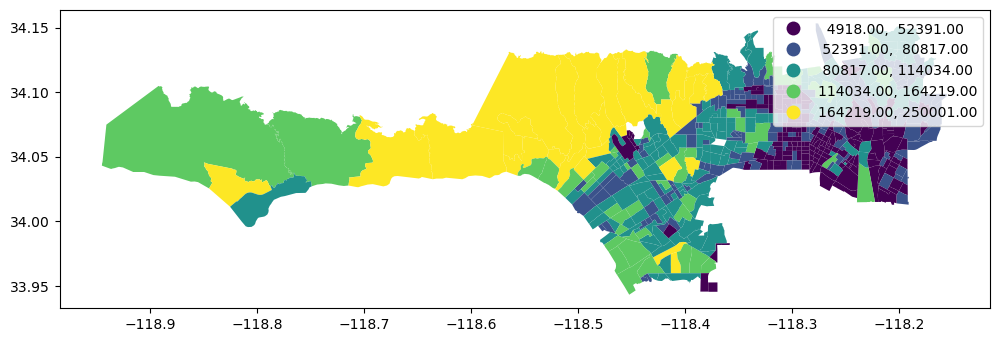

In [32]:
df3.plot(figsize=(12,10),
                 column='med_hh_income',
                 legend=True, 
                 scheme='NaturalBreaks')

### This visualization helps us see that much of the wealth is distributed in SPA 5, as those census tracts are making upwards $80k. As we look to the right of the map, which is SPA 4, the map is predominantly blue and purple, indicating lower income.  

In [33]:
### I will now run a folium map to help produce an interactive map. I am using a combined data file that I created several weeks ago. This will help cut down on memory usage and cell creation
geo_json_data='combineddata.geojson'

In [34]:
### Importing libraries I will need and setting up the colormap that I will be utilizing to breakdown the median household income.  
import folium 
import branca

colormap = branca.colormap.LinearColormap(
    vmin=df3["med_hh_income"].quantile(0.0),
    vmax=df3["med_hh_income"].quantile(1),
    colors=["red", "orange", "lightblue", "green", "darkgreen"],
    caption="SPA Level Median Household Income",
)

In [35]:
import folium

### Creating my map centered around SPA 4 and 5 in LA County. I've input the coordinates and set my zoom to 10.
m = folium.Map(location=[34.052235, -118.243683], zoom_start=10)

### Here I am defining my popup and tooltip settings.
popup = folium.GeoJsonPopup(
    fields=["med_hh_income"],  
    aliases=["Median HH Income"], 
    localize=True,
    labels=True,
    style="background-color: yellow;",
)

tooltip = folium.GeoJsonTooltip(
    fields=["med_hh_income"], 
    aliases=["Median HH Income"],  
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)

### Incorporating my geojson layer. 
g = folium.GeoJson(
    df3,
    style_function=lambda x: {
        "fillColor": colormap(x["properties"]["med_hh_income"]) 
        if x["properties"]["med_hh_income"] is not None
        else "transparent",
        "color": "black",
        "fillOpacity": 0.4,
    },
    tooltip=tooltip,
    popup=popup,
).add_to(m)

### Adding the colormap to my map.
colormap.add_to(m)

### Calling back my map to ensure that my code was written correctly and can run without error. 
m


### This visually illustrates which neighborhoods are making a greater income. We can see pretty clearly that majority of the green census tracts (i.e., higher income) is concentrated on the left side of the chart. As we start to get towards the right side (SPA 4), it's a mix of yellow and red with an occasional green census tract. 

In [37]:
m.save('LA_Median_HH_Income.html')

### My group is also looking at the racial/ethnic breakdown of these two SPAs. I will begin reading in and importing the various files needed to do so. 

In [36]:
### Importing pandas again. 

import pandas as pd

### Loading the datafile that contains race/ethnicity. This will be known as rf.
rf = pd.read_csv('R13280610_SL140.csv')

In [37]:
### As usual, I will get the shape of this file.
rf.shape

(2498, 50)

In [38]:
### Running the head command to see the variable names and understand which ones I will have to rename in the coming steps.
rf.head()

,tract,Geo_NAME,Geo_QNAME,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CS,Geo_CT,Geo_PLACE,Geo_CSA,...,SE_T017_020,SE_T017_002,SE_T017_004,SE_T017_006,SE_T017_008,SE_T017_010,SE_T017_012,SE_T017_014,SE_T017_016,SE_T017_018
0,6037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",0,6,37,NaN,101110,NaN,NaN,...,4.121750,4.050484,6.927711,-12.162162,-50.000000,-10.699588,100.0,-53.333333,23.776224,4.305136
1,6037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",0,6,37,NaN,101122,NaN,NaN,...,1.746725,3.140175,7.263028,19.230769,75.000000,-20.808081,-100.0,130.000000,2.586207,-5.739130
2,6037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",0,6,37,NaN,101220,NaN,NaN,...,-0.564972,8.225729,5.354994,-5.555556,-63.636364,29.411765,-100.0,600.000000,-3.809524,-15.015723
3,6037101221,Census Tract 1012.21,"Census Tract 1012.21, Los Angeles County, Cali...",0,6,37,NaN,101221,NaN,NaN,...,0.291206,0.132567,5.444126,-17.977528,-25.000000,-5.747126,0.0,100.000000,-41.666667,0.597780
4,6037101222,Census Tract 1012.22,"Census Tract 1012.22, Los Angeles County, Cali...",0,6,37,NaN,101222,NaN,NaN,...,9.859155,17.241379,27.074236,-19.148936,50.000000,-20.855615,NaN,NaN,-2.500000,-0.763359


In [39]:
### Adding in the leading zero for GEO_FIPS data.

rf = pd.read_csv(
    'R13280610_SL140.csv',
    dtype=
    {
        'tract':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [40]:
### I am also dropping out a few of the columns that are unneccessary to slim down the file a bit. 
rf.columns[rf.isna().all()].tolist()

['Geo_CS', 'Geo_PLACE', 'Geo_CSA']

In [41]:
### As a self reminder, axis = 0 drops the rows. Axis = 1 drops columns with the null.
rf = rf.dropna(axis=1,how="all")

In [42]:
### Re-running the head command to make sure that this worked properly.
rf.head()

,tract,Geo_NAME,Geo_QNAME,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CT,SE_T004_019,SE_T004_001,SE_T004_003,...,SE_T017_020,SE_T017_002,SE_T017_004,SE_T017_006,SE_T017_008,SE_T017_010,SE_T017_012,SE_T017_014,SE_T017_016,SE_T017_018
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",0,06,037,101110,4926,3545,2840,...,4.121750,4.050484,6.927711,-12.162162,-50.000000,-10.699588,100.0,-53.333333,23.776224,4.305136
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",0,06,037,101122,3728,3186,2614,...,1.746725,3.140175,7.263028,19.230769,75.000000,-20.808081,-100.0,130.000000,2.586207,-5.739130
2,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",0,06,037,101220,3344,2263,1751,...,-0.564972,8.225729,5.354994,-5.555556,-63.636364,29.411765,-100.0,600.000000,-3.809524,-15.015723
3,06037101221,Census Tract 1012.21,"Census Tract 1012.21, Los Angeles County, Cali...",0,06,037,101221,3444,2266,1840,...,0.291206,0.132567,5.444126,-17.977528,-25.000000,-5.747126,0.0,100.000000,-41.666667,0.597780
4,06037101222,Census Tract 1012.22,"Census Tract 1012.22, Los Angeles County, Cali...",0,06,037,101222,2808,1768,1455,...,9.859155,17.241379,27.074236,-19.148936,50.000000,-20.855615,NaN,NaN,-2.500000,-0.763359


In [43]:
### It's great to see that it worked, but I want to remove most of the things that I am not interested in looking at. To fix this, I am bringing in a new dataframe dicating which
### variables I want to keep.
columns_to_keep = ['tract',
                   'SE_T004_019',
                   'SE_T004_001',
                   'SE_T004_003',
                   'SE_T004_005',
                   'SE_T004_007',
                   'SE_T004_009',
                   'SE_T004_011',
                   'SE_T004_013',
                   'SE_T004_015',
                   'SE_T004_017']
### The new dataframe will be called rf2.
rf2 = rf[columns_to_keep]

In [44]:
### Viewing the column list to understand whether it worked.  
columns = list(rf2)
columns

['tract',
 'SE_T004_019',
 'SE_T004_001',
 'SE_T004_003',
 'SE_T004_005',
 'SE_T004_007',
 'SE_T004_009',
 'SE_T004_011',
 'SE_T004_013',
 'SE_T004_015',
 'SE_T004_017']

In [45]:
### Renaming the variables to understand the description quickly. I will keep 'tract' as is since that is what I have been using for other files.
rf2.columns = ['tract',
'TotalPop',
'Non Hispanic',
'Non Hispanic White Alone',
'Non Hispanic Black Alone',
'Non Hispanic American Indian and Alaska Native Alone',
'Non Hispanic Asian Alone',
'Non Hispanic Native Hawaiian and Pacific Islander Alone',
'Non Hispanic Other Alone',
'Non Hispanic Multi Race',
'Hispanic']

### Checking that the variables have been updated accordingly. 

In [46]:
rf2.sample(5)

,tract,TotalPop,Non Hispanic,Non Hispanic White Alone,Non Hispanic Black Alone,Non Hispanic American Indian and Alaska Native Alone,Non Hispanic Asian Alone,Non Hispanic Native Hawaiian and Pacific Islander Alone,Non Hispanic Other Alone,Non Hispanic Multi Race,Hispanic
1329,06037407501,4445,946,156,70,11,626,2,20,61,3499
754,06037221900,4917,3725,1434,571,9,1538,12,22,139,1192
294,06037133102,3376,2179,1491,167,19,349,3,24,126,1197
822,06037232701,2228,507,19,387,1,7,4,35,54,1721
1634,06037503802,5139,3129,1369,68,15,1459,18,32,168,2010


In [47]:
### Now I will merge this file with my other datafile (df) as it contains the SPAs. Re-introducing it in this cell.
df = pd.read_csv('spas.csv')

In [48]:
df.head()

,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length
0,6037199700,38892.0,1204,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463240
1,6037199801,41027.0,903,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827
2,6037199802,42500.0,612,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225
3,6037199900,37232.0,845,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728020
4,6037201110,65000.0,782,Low Income,Yes,No,Yes,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383640


In [49]:
### Adding the leading zero back in as it disappeared on us. 
df = pd.read_csv(
    'spas.csv',
    dtype=
    {
        'tract':str
    
    }
)

In [50]:
### Ensuring that it worked before moving on. 
df.head()

,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length
0,06037199700,38892.0,1204,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463240
1,06037199801,41027.0,903,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827
2,06037199802,42500.0,612,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225
3,06037199900,37232.0,845,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728020
4,06037201110,65000.0,782,Low Income,Yes,No,Yes,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383640


In [51]:
### Leading zero has been accounted for. Merging the two based on the variable titled 'tract'. The combined dataframe will be called race. 
race=df.merge(rf2,on='tract')

In [52]:
### Checking that this works properly before moving on. 
race.head()

,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,...,TotalPop,Non Hispanic,Non Hispanic White Alone,Non Hispanic Black Alone,Non Hispanic American Indian and Alaska Native Alone,Non Hispanic Asian Alone,Non Hispanic Native Hawaiian and Pacific Islander Alone,Non Hispanic Other Alone,Non Hispanic Multi Race,Hispanic
0,06037199700,38892.0,1204,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,...,3393,1200,519,95,7,479,4,28,68,2193
1,06037199801,41027.0,903,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,...,3036,1090,92,38,2,929,0,5,24,1946
2,06037199802,42500.0,612,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,...,2144,972,53,7,8,859,0,4,41,1172
3,06037199900,37232.0,845,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,...,2641,616,76,57,0,447,4,13,19,2025
4,06037201110,65000.0,782,Low Income,Yes,No,Yes,District 1,Los Angeles - El Sereno,SPA 4 - Metro,...,2332,595,258,54,2,250,1,3,27,1737


In [53]:
### I need to ensure that some additional packages are still in jupyterhub before running my maps for each racial/ethnic category.
import geopandas as gpd

In [54]:
### Reading in my GEOJson file as it is needed to help visualize data.
tracts=gpd.read_file('Census_Tracts_2020.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [55]:
### Subsetting the data to the essentials. 
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [56]:
### Adding in a FIPS column as I did earlier.
tracts['tract'] ='06' + '037' + tracts['CT20']

### Checking that the FIPS column was successfully implemented. 

In [57]:
tracts.head()

,CT20,geometry,tract
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [58]:
### I will now merge this geojson file with my two previous datasets. This combined datafile will be labeled as tracts_race.
tracts_race=tracts.merge(race,on="tract")

In [59]:
### Checking that it worked by running our reliable head function.
tracts_race.head()

,CT20,geometry,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,...,TotalPop,Non Hispanic,Non Hispanic White Alone,Non Hispanic Black Alone,Non Hispanic American Indian and Alaska Native Alone,Non Hispanic Asian Alone,Non Hispanic Native Hawaiian and Pacific Islander Alone,Non Hispanic Other Alone,Non Hispanic Multi Race,Hispanic
0,181000,"POLYGON ((-118.19820 34.15163, -118.19893 34.1...",06037181000,107708.0,2315,Above Moderate Income,No,No,No,District 1,...,6132,4491,2552,91,15,1465,5,46,317,1641
1,181300,"POLYGON ((-118.21866 34.13912, -118.21873 34.1...",06037181300,115174.0,1296,Above Moderate Income,No,No,No,District 1,...,3613,2506,1252,65,7,982,4,13,183,1107
2,181400,"POLYGON ((-118.21519 34.13931, -118.21631 34.1...",06037181400,85409.0,1674,Low Income,No,No,Yes,District 1,...,4134,2761,1291,79,13,1172,3,24,179,1373
3,181500,"POLYGON ((-118.19982 34.13961, -118.20098 34.1...",06037181500,114034.0,1405,Above Moderate Income,No,No,No,District 1,...,3653,2280,1324,52,5,701,3,21,174,1373
4,181600,"POLYGON ((-118.20208 34.13103, -118.20205 34.1...",06037181600,90571.0,1079,Low Income,No,No,Yes,District 1,...,4247,2937,1645,124,11,865,15,23,254,1310


### As shown in our lab discussion, I will have to run some calculations to understand whether there are clusters that are densely populated by a certain racial/ethnic group. This willl be achieved by asking python to take percentages of the Black, White, Asian, and Hispanic populations in the dataset. 

In [60]:
### Running the calculations here using the same naming conventions used in class. 
tracts_race['PCT_Black'] = tracts_race['Non Hispanic Black Alone']/tracts_race['TotalPop']*100
tracts_race['PCT_White'] = tracts_race['Non Hispanic White Alone']/tracts_race['TotalPop']*100
tracts_race['PCT_Asian'] = tracts_race['Non Hispanic Asian Alone']/tracts_race['TotalPop']*100
tracts_race['PCT_Hispanic'] = tracts_race['Hispanic']/tracts_race['TotalPop']*100

### I want to run the racial/ethnic makeup four different times. That can be tedious and repetative, so I will incorporate a function and loop to improve my data workflow.

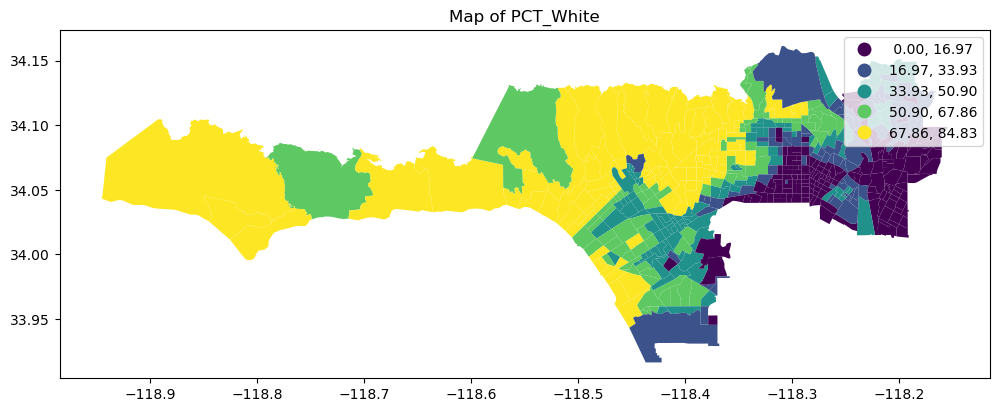

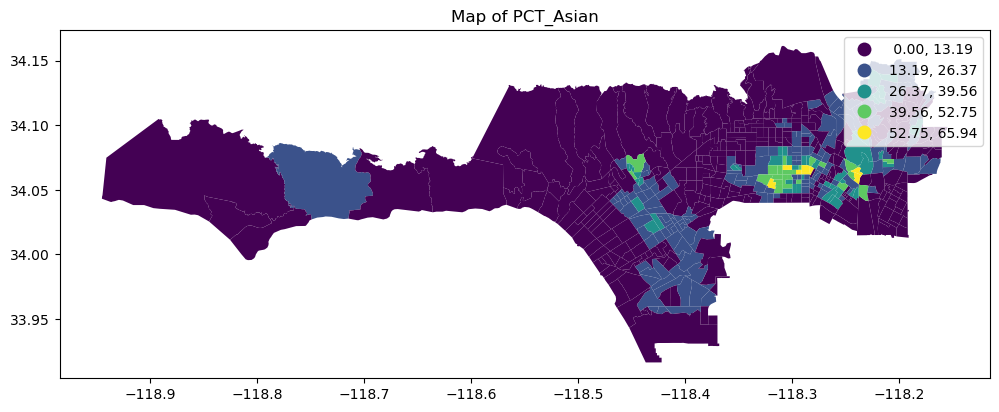

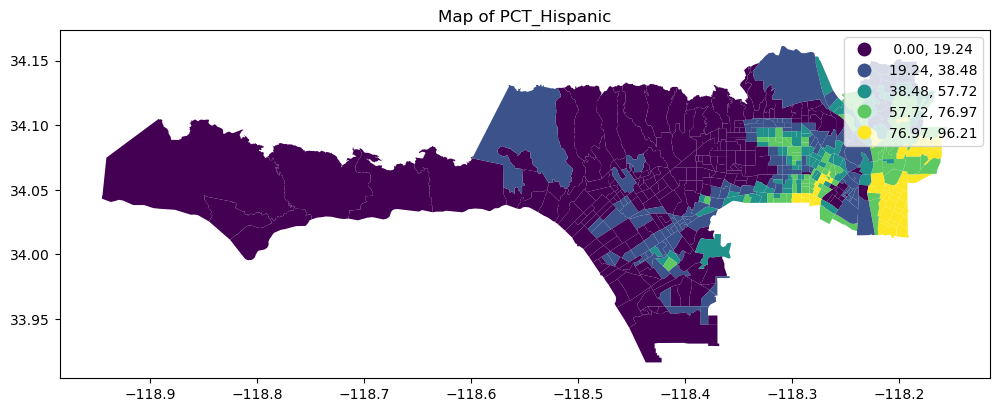

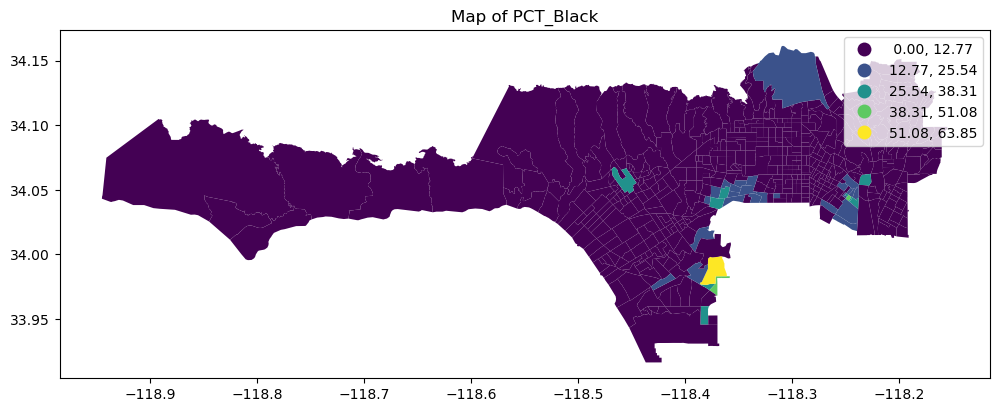

In [61]:
### Bringing in the appropriate library for this particular map. 
import matplotlib.pyplot as plt

### Defining the column that I want to look at (i.e., the function), which is demographic percentages.  
### Also setting a map name using the ax.set_title function.

def plot_demographic_percentage(column_name):
    "Plot demographic percentage based on the column name."
    ax = tracts_race.plot(figsize=(12,10),
                          column=column_name,
                          legend=True, 
                          scheme='equal_interval',
                          cmap='viridis')
    ax.set_title(f"Map of {column_name}")
    plt.show()

demographics = ['PCT_White', 'PCT_Asian', 'PCT_Hispanic', 'PCT_Black']

for demographic in demographics:
    plot_demographic_percentage(demographic)


### White individuals are predominantly located in SPA 5, although there is a smaller percentage in SPA 4. As for Asians and Hispanics, there is a greater proportion of the population located in SPA 4. Looking at the last chart that portrays the Black demographic makeup, it does not show a large amount of Black individuals living in either SPA. There are a few census tracts that have over 30% of Black individuals in that census tract, but it is relatively small compared to the other groups.   

### As for next steps of the project, in notebook 2 the team is utilizing a joint datafile a joint datafile to begin analysis of the relationship between the multiple variables we explored in the midterm to understand potential correlations and what factors influence low birth weight. 

# Continue to Notebook 2 to see additional work. 
# Group Members and Division of Labor
### Maya Coronado: Cut down the socioeconomic data to SPAs 4 and 5 only and created function/loop for race/ethnicity to use in future analysis.  Analyzed race breakup and median household income across 5 SPAs in LA County. (Coded in Notebook 1) 
### Xander Lee: Cut down the grocery access data down to SPAs 4 and 5 and cleaned up extraneous factors. 
### Kiran Rao and Savannah Gourley: Combined socioeconomic data, grocery access data, and birth outcome data into one data set and aligned with geopgrahic information. Also focusing on 2 SPAs, starting the step of multivariable analyses for deeper divers into communities. (Coded in Notebook 2)